In [1]:
import tensorflow as tf
print(tf.__version__)


2.17.1


In [2]:
# load in the data
from sklearn.datasets import load_breast_cancer


In [3]:
data = load_breast_cancer()


In [4]:
type(data)

sklearn.utils._bunch.Bunch

In [5]:
data.keys()
data.data.shape
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [6]:
data.target_names


array(['malignant', 'benign'], dtype='<U9')

In [7]:
data.target.shape

(569,)

In [8]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [9]:
# do a train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [10]:

N,D = X_train.shape
N, D

(381, 30)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # does fit and transform in 1 step fitting on the train set as this well he;p us find the mean and variance of each column
X_test = scaler.transform(X_test)


In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'] )

In [14]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.3804 - loss: 0.8626 - val_accuracy: 0.4840 - val_loss: 0.8127
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4905 - loss: 0.7709 - val_accuracy: 0.5372 - val_loss: 0.7392
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6111 - loss: 0.6770 - val_accuracy: 0.5904 - val_loss: 0.6761
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6610 - loss: 0.6514 - val_accuracy: 0.6702 - val_loss: 0.6207
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7224 - loss: 0.5712 - val_accuracy: 0.7234 - val_loss: 0.5746
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8094 - loss: 0.5111 - val_accuracy: 0.7553 - val_loss: 0.5346
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8389 - loss: 0.4814 - val_accuracy: 0.7872 - val_loss: 0.5006
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8537 - loss: 0.4645 - val_accuracy: 0.

In [15]:
print("Train score: ",model.evaluate(X_train, y_train))
print("Test score: ", model.evaluate(X_test, y_test))


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9878 - loss: 0.0801 
Train score:  [0.08049361407756805, 0.9868766665458679]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.1200 
Test score:  [0.13520437479019165, 0.9627659320831299]


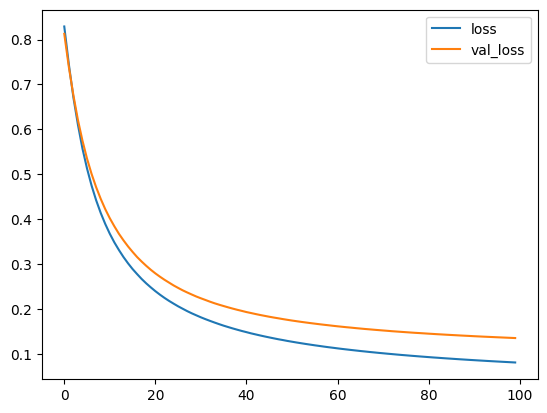

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

# Making Predictions

In [17]:
# Make predictions
P = model.predict(X_test)
print(P)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
[[2.82836936e-05]
 [1.20606981e-01]
 [9.48418021e-01]
 [1.03252663e-04]
 [9.53377426e-01]
 [2.36268327e-01]
 [9.35242534e-01]
 [9.99729455e-01]
 [9.99258518e-01]
 [9.33193803e-01]
 [9.30808246e-01]
 [9.31690812e-01]
 [9.98334885e-01]
 [4.25659001e-01]
 [9.98837590e-01]
 [9.04947519e-01]
 [1.19178709e-04]
 [4.28029776e-01]
 [1.91008374e-02]
 [3.76684666e-02]
 [9.89624619e-01]
 [9.99638021e-01]
 [8.41540896e-07]
 [3.94043587e-02]
 [9.94465590e-01]
 [9.81270015e-01]
 [2.80992083e-07]
 [9.23256099e-01]
 [9.75357890e-01]
 [1.18697062e-06]
 [9.12073612e-01]
 [9.84916508e-01]
 [3.75004129e-05]
 [9.50594246e-01]
 [2.81605724e-04]
 [2.14563636e-03]
 [8.34278286e-01]
 [8.75269528e-04]
 [9.96784985e-01]
 [1.72617706e-06]
 [9.97734487e-01]
 [9.68096852e-01]
 [7.26691604e-01]
 [5.40825248e-01]
 [9.88609195e-01]
 [9.99879360e-01]
 [1.56129627e-02]
 [9.98775482e-01]
 [9.98244524e-01]
 [9.53640223e-01]
 [7.89248168e-01]
 [4.50098095e-03]
 [3.30564013e-04]
 [1.2420

In [18]:
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0.]


In [19]:
# calculate the accuracy and compare it to the evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9627659574468085
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9691 - loss: 0.1200 
Evaluate output [0.13520437479019165, 0.9627659320831299]


# Saving and Loading a Model

In [20]:
# To save a model pass in the file path to save
model.save('linearclassifier.h5')

In [21]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  18K Dec 15 20:15 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Dec 12 14:22 sample_data


In [22]:
model = tf.keras.models.load_model('linearclassifier.h5') #can save and then load it back in
print(model.layers)
model.evaluate(X_test, y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9691 - loss: 0.1200  


[0.13520437479019165, 0.9627659320831299]